In [ ]:
import pickle

with open( 'credit.pkl' , 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
x_credit_treinamento.shape, y_credit_treinamento.shape 


In [ ]:
x_credit_teste.shape, y_credit_teste.shape

In [ ]:
from sklearn.naive_bayes import GaussianNB


naive_credit_data = GaussianNB() # Cria o modelo
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento) # Treina o modelo

# Com isso, o modelo já está treinado e pronto para fazer previsões

In [ ]:
previsoes = naive_credit_data.predict(x_credit_teste) # Faz as previsões

In [ ]:
previsoes

In [ ]:
y_credit_teste

Obviamente não precisa-se comparar linha por linha das previsões, pois o sklearn já faz isso para nós. com auxilio da função accuracy_score, podemos comparar as previsões com os valores reais e obter a acurácia do modelo.

In [36]:
from sklearn.metrics import accuracy_score , classification_report

accuracy_score(y_credit_teste, previsoes)

# o modelo acertou 93.8% das previsões

0.938

### Entendendo  a Matriz de Confusão

A matriz de confusão é uma tabela que nos permite a visualização do desempenho de um algoritmo de classificação. A ideia é verificar a acurácia do modelo, ou seja, a quantidade de acertos e erros.

[428,   8]

[ 23,  41]

Neste exemplo, temos 428+41 = 469 acertos e 23+8 = 31 erros. A diagonal principal da matriz de confusão nos mostra os acertos, enquanto a diagonal secundária nos mostra os erros.

In [ ]:
# Matriz de confusão

from sklearn.metrics import confusion_matrix

confusion_matrix(y_credit_teste, previsoes)

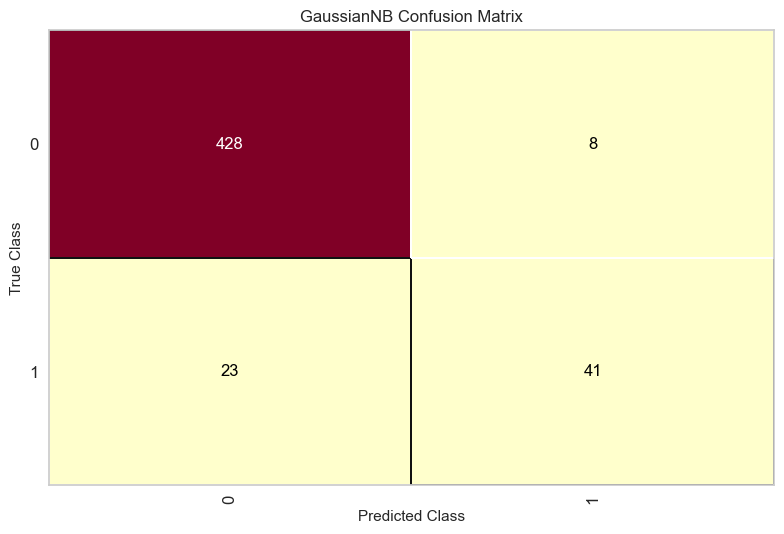

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [35]:
# Visualizando a matriz de confusão
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)
cm.poof()

In [37]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



#### Conclusões a partir do algoritmo Naive Bayes:

- O algoritmo encontrou 64% dos casos da classe 1 e acertou 84% destes encontrados
- O algoritmo encontrou 98% dos casos da classe 0 e acertou 95% destes encontrados

Conclui-se que o algoritmo se dá muito bem com os dados da classe 0 e medianamente bem com os dados da classe 1.